  #                              **Introduction**

* This is a Case Study project. We will be analyzing 30 FitBit users data, to discover insights on how customers are using their smart devices. We will then apply these insights into helping 'Bellabeat', (A high-tech company that manufactures health focused smart products to inform and inspire women), with some recommendations on how to better market their own devices to their customers.

# **Phase #1-ASK**

**Business Task** 
- Analyze a non-Bellabeat smart device usage data (FitBit data). To gain insight on how costumers are already using these devices. From the insights gathered, provide high level recommendations for the marketing team, that will help reveal more opportunity growth for one of Bellabeat's products.

**Key Stakeholders**  
- Urška Sršen, who is Bellabeat's cofounder and Chief Creative Officer
- Sandor Mur, who is a mathematician and Bellabeat's cofounder
- Bellabeat's executive team
- Bellabeat's marketing analytics team

# **Phase #2-PREPARE**

**Data Credibility/Integrity**
* We were provided with FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius). The data contains information on 30 consenting FitBit users. This information includes data on minute-level output for physical activity, heart rate, information on daily activity and steps.
* While exploring the data the limitations I found were that it contains a small sample size of 30 FitBit users. This may not be an accurate representation of the whole FitBit population. Secondly, the data is about 7 years old. It was collected between the dates of (4/12/16 - 5/12/16). 

In [1]:
## Installing and loading up the packages we will use

install.packages("tidyverse")
library(tidyverse)
install.packages("skimr")
library(skimr)
install.packages("janitor")
library(janitor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
## Loading the csv files we will use. I am only loading up daily_activity and sleep_day datasets becasue they are the main datasets I will use for this analysis. Plus the daily_activity dataset already includes information from the other datasets.

daily_activity <- read_csv("/kaggle/input/fitbit-datasets/dailyActivity_merged.csv")
sleep_day <- read_csv("/kaggle/input/fitbit-datasets/sleepDay_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
## Exploring our datasets a litte further. We will now take a look at what type of columns we have within these two datasets.

colnames(daily_activity)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

In [4]:
colnames(sleep_day)

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

In [5]:
## We will now check out a small summary of each dataset

head(daily_activity)

head(sleep_day)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


# **Phase #3-Process**

Before merging the data, I will clean up the column names of both datasets, to make sure they are all unique and consistent. I will then count the number of participants in each datasets using id #'s, as well as the number of days of data that we have in both datasets. 


In [6]:
## Clean the column names, making sure they are unique and consistent

daily_activity <- clean_names(daily_activity)
sleep_day <- clean_names(sleep_day)

In [7]:
## Count the number of participants/days in each dataset

n_distinct(daily_activity$id)
n_distinct(sleep_day$id)

[1] 33

[1] 24

In [8]:
## Here we will count the number of distinct days we have

n_distinct(daily_activity$activity_date)
n_distinct(sleep_day$sleep_day)

[1] 31

[1] 31

**Analysis**: The 'Daily activity' dataset shows there are 33 distinct id #'s, meaning there are 33 FitBit users we have data for. It also shows activity dates from (4/12/16 - 5/12/16), that equals up to 31 days of activity tracked. If every user had 31 days of tracked activity, we would have 1023 objectives but from our data we only have 940. That is 83 days worth of data that we are missing. From that information we can already say that not all FitBit user's used their devices for 31 days consecutively. There were days they used it and other days they did not. This is not including how long they used it for each day.

We went a step further and looked at the sleep data as well. For our sleep data we only have 24 distinct users data tracked and 31 distinct days. If we had all the data for each of the 24 users, we would have 744 objectives but we only have 413. 

We will continue with our analysis with the data that we have.

In [9]:
## Seperate column names for better formatting. This will also help when merging the datasets.

sleep_day <- sleep_day %>% 
  separate(sleep_day, into=c("activity_date", "time"), sep = " ")

Warning message:
“Expected 2 pieces. Additional pieces discarded in 413 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [10]:
## Joining Datasets. Here we will join the two datasets by id# and activity date. Also arrange them in ascending order by id#

joined_data <- full_join(daily_activity,sleep_day,by=c("id","activity_date"), all=TRUE) %>% 
  drop_na() %>% 
  arrange('id')
head(joined_data)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,time,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,12:00:00,1,327,346
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,12:00:00,2,384,407
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,12:00:00,1,412,442
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,12:00:00,2,340,367
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,12:00:00,1,700,712
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,12:00:00,1,304,320


# **Phase #4-Analyze**

In [11]:
## Here we will add up all the activity minutes then put it into a new column.

joined_data <- joined_data %>%
  rowwise() %>%
  mutate(
    Activity_total = sum(c(very_active_minutes,fairly_active_minutes,lightly_active_minutes)))
head(joined_data)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,time,total_sleep_records,total_minutes_asleep,total_time_in_bed,Activity_total
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,12:00:00,1,327,346,366
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,12:00:00,2,384,407,257
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,12:00:00,1,412,442,272
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,12:00:00,2,340,367,267
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,12:00:00,1,700,712,222
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,12:00:00,1,304,320,345


In [12]:
## Summarize the 'mean' of the joined dataset

mean_joined_data <- joined_data %>% 
  group_by(id) %>% 
  summarize(mean_steps = mean(total_steps),
            mean_very_a_min = mean(very_active_minutes),
            mean_fairly_a_min = mean(fairly_active_minutes),
            mean_lightly_a_min = mean(lightly_active_minutes),
            mean_sedentary_min = mean(sedentary_minutes),
            mean_total_activity = mean(Activity_total),
            mean_calories = mean(calories),
            mean_distance = mean(total_distance),
            mean_l_a_distance = mean(light_active_distance),
            mean_v_a_distance = mean(very_active_distance),
            mean_f_a_distance = mean(moderately_active_distance),
            mean_total_min_asleep = mean(total_minutes_asleep))
head(mean_joined_data)

id,mean_steps,mean_very_a_min,mean_fairly_a_min,mean_lightly_a_min,mean_sedentary_min,mean_total_activity,mean_calories,mean_distance,mean_l_a_distance,mean_v_a_distance,mean_f_a_distance,mean_total_min_asleep
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12405.680,37.9200000,20.2800000,233.12,759.2800,291.3200,1872.280,7.971200,4.346000,2.772000003,0.84719999,360.2800
1644430081,7967.750,2.5000000,19.5000000,241.25,920.5000,263.2500,2977.750,5.792500,4.750000,0.174999999,0.86250003,294.0000
1844505072,3477.000,0.0000000,2.3333333,145.00,443.3333,147.3333,1676.333,2.303333,2.213333,0.000000000,0.08666666,652.0000
1927972279,1490.000,0.0000000,0.0000000,85.00,977.2000,85.0000,2316.200,1.032000,1.032000,0.000000000,0.00000000,417.0000
2026352035,5618.679,0.1071429,0.2857143,256.50,653.9643,256.8929,1540.786,3.487143,3.466429,0.006785714,0.01250000,506.1786
2320127002,5079.000,0.0000000,0.0000000,242.00,1129.0000,242.0000,1804.000,3.420000,3.420000,0.000000000,0.00000000,61.0000


In [13]:
## Calculate the total minutes that the Fitbit logged for each user.(All activity minutes + sedentary minutes + minutes asleep). We want to find out if everything adds up to 24hrs or close to that.

mean_joined_data %>% 
  rowwise() %>%
  mutate(
  TotalActivity_plus_sedentary_plus_sleep=sum(c(mean_very_a_min,mean_fairly_a_min, mean_lightly_a_min, mean_sedentary_min, mean_total_min_asleep))) %>% 
  summarise(TotalActivity_plus_sedentary_plus_sleep/60) %>% 
  drop_na()

TotalActivity_plus_sedentary_plus_sleep/60
<dbl>
23.51467
24.62917
20.71111
24.65333
23.61726
23.86667
22.44000
21.20833
24.00417


**Analysis:** Here we see that everything adds up close to 24hrs

In [14]:
## Here we want to group the users into the 4 activity level categories, based on which activity level type they spend the most minutes in

user_activity_level <- daily_activity %>%
  group_by(id) %>% 
  summarize(
    user_type=case_when(
      sedentary_minutes > mean(sedentary_minutes) & lightly_active_minutes < mean(lightly_active_minutes) & fairly_active_minutes < mean(fairly_active_minutes) & very_active_minutes < mean(very_active_minutes) ~ "Sedentary",
      sedentary_minutes < mean(sedentary_minutes) & lightly_active_minutes > mean(lightly_active_minutes) & fairly_active_minutes < mean(fairly_active_minutes) & very_active_minutes < mean(very_active_minutes) ~ "Lightly Active",
      sedentary_minutes < mean(sedentary_minutes) & lightly_active_minutes < mean(lightly_active_minutes) & fairly_active_minutes > mean(fairly_active_minutes) & very_active_minutes < mean(very_active_minutes) ~ "Fairly Active",
      sedentary_minutes < mean(sedentary_minutes) & lightly_active_minutes < mean(lightly_active_minutes) & fairly_active_minutes < mean(fairly_active_minutes) & very_active_minutes > mean(very_active_minutes) ~ "Very Active"),
    calories, total_distance, total_steps) %>%
  drop_na()
head(user_activity_level)

`summarise()` has grouped output by 'id'. You can override using the `.groups`
argument.


id,user_type,calories,total_distance,total_steps
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,Lightly Active,1985,8.50,13162
1503960366,Sedentary,1776,6.74,10460
1503960366,Fairly Active,1745,6.28,9762
1503960366,Lightly Active,1863,8.16,12669
1503960366,Fairly Active,1728,6.48,9705
1503960366,Very Active,2013,9.80,15355


In [15]:
## Here we will calculate all the FitBit users and what percentage of them are (Fairly active, Lightly active, Sedentary or Very Active) Depending on which type of activity they spent the most minutes in.

percent_user_activity_level <- user_activity_level %>%
  group_by(`user_type`) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(`user_type`) %>%
  summarise(total_percent = total / totals * 100)
head(percent_user_activity_level)

user_type,total_percent
<chr>,<dbl>
Fairly Active,3.00
Lightly Active,39.25
Sedentary,53.25
Very Active,4.50


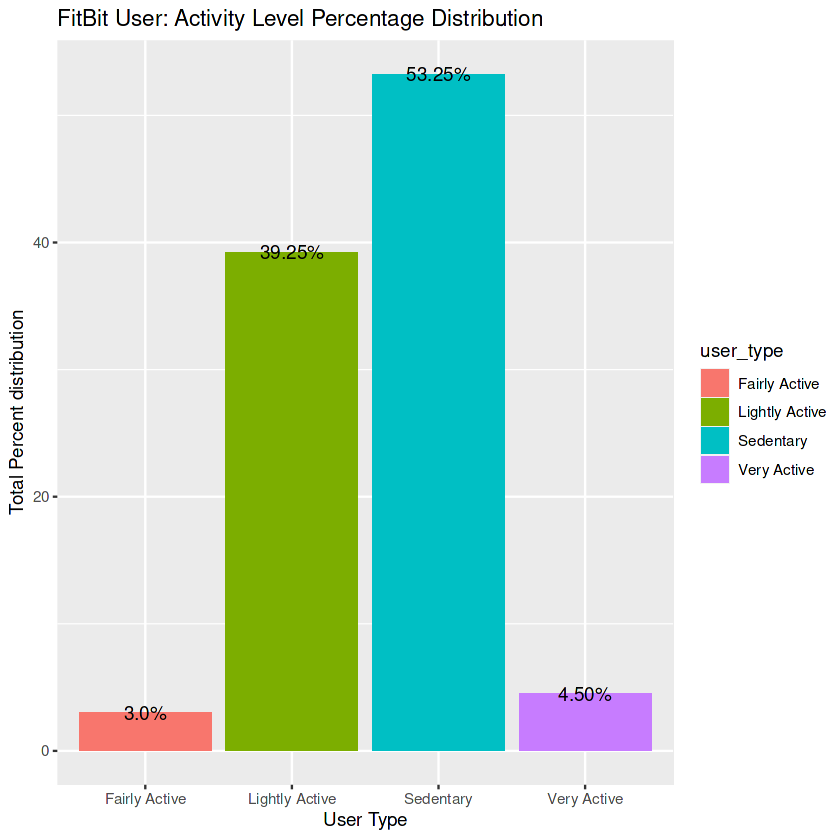

In [16]:
## Plot the percent distribution of FitBit users of each activity level type

ggplot(data=percent_user_activity_level)+
  geom_col(mapping = aes(x=user_type, y=total_percent,fill=user_type))+
  annotate("text", x='Sedentary', y=53.25,label="53.25%")+
  annotate("text", x='Lightly Active', y=39.25, label="39.25%")+
  annotate("text", x='Very Active', y=4.50, label="4.50%")+
  annotate("text", x='Fairly Active', y=3.0, label="3.0%")+
  labs(title = "FitBit User: Activity Level Percentage Distribution", x="User Type", y="Total Percent distribution")

**Analysis:** Here we can see that most users spend most of their minutes in a day 'sedentary'. Next highest in order are 'Lightly active', 'Very active' then 'Fairly active'. Now this can be due to users actually being mostly sedentary throughout the day and/or they did not wear their FitBit devices for the whole day, resulting in more sedentary minutes being tracked. As we saw previous, not all users consistently wore their devices for 31 consecutive days. So, there is a possibility that on the days they did wear the device, that they did not wear it for the whole day.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



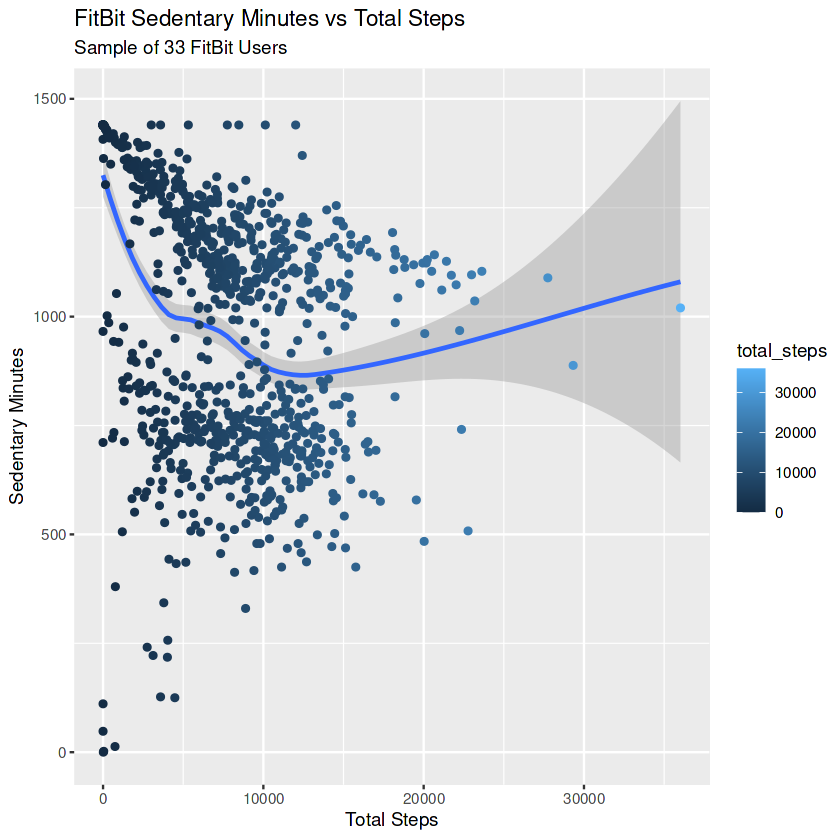

In [17]:
## Plot relationship between Total Steps vs Sedentary Minutes. Since more than half of the users are sedentary throughout the day. We want to find out how being mostly sedentary effects their daily steps.

ggplot(data= daily_activity)+
  geom_smooth(mapping = aes(x=total_steps, y=sedentary_minutes))+
  geom_point(mapping = aes(x=total_steps, y=sedentary_minutes,color=total_steps))+
  labs(title="FitBit Sedentary Minutes vs Total Steps", subtitle= "Sample of 33 FitBit Users", x="Total Steps", y="Sedentary Minutes")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



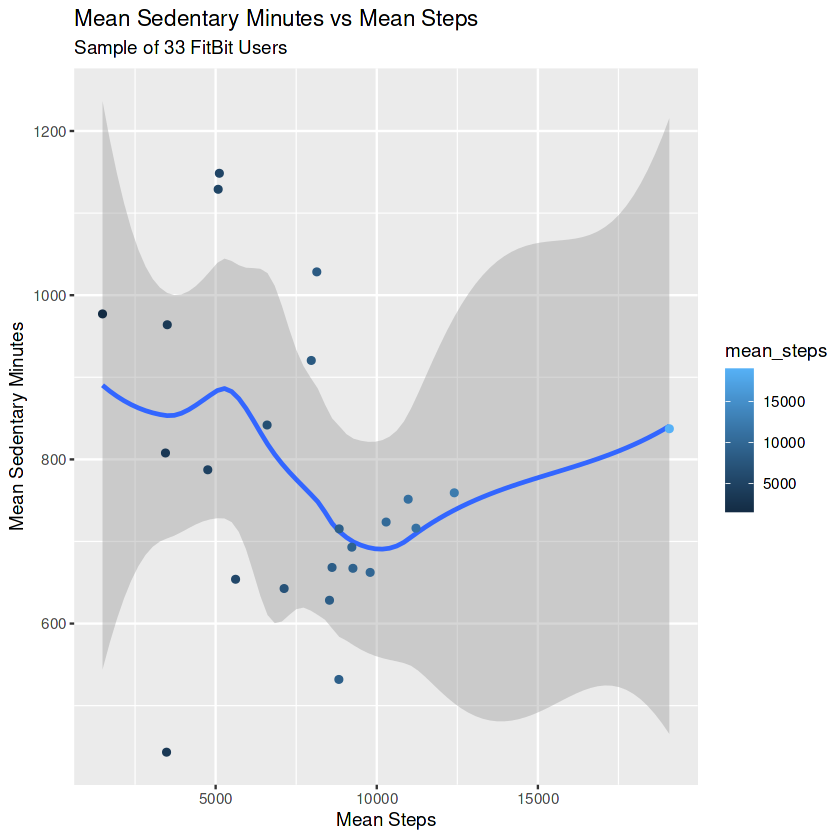

In [18]:
## For more clarification lets plot the mean Total Steps vs Mean Sedentary Minutes

ggplot(data= mean_joined_data)+
  geom_smooth(mapping = aes(x=mean_steps, y=mean_sedentary_min))+
  geom_point(mapping = aes(x=mean_steps, y=mean_sedentary_min,color=mean_steps))+
  labs(title="Mean Sedentary Minutes vs Mean Steps", subtitle = "Sample of 33 FitBit Users", x="Mean Steps", y="Mean Sedentary Minutes")

**Analysis:** Here we see that users are less sedentary the more steps they take. From this we can assume that being more active will equal more steps taken daily. We will plot this out next, just to make sure.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



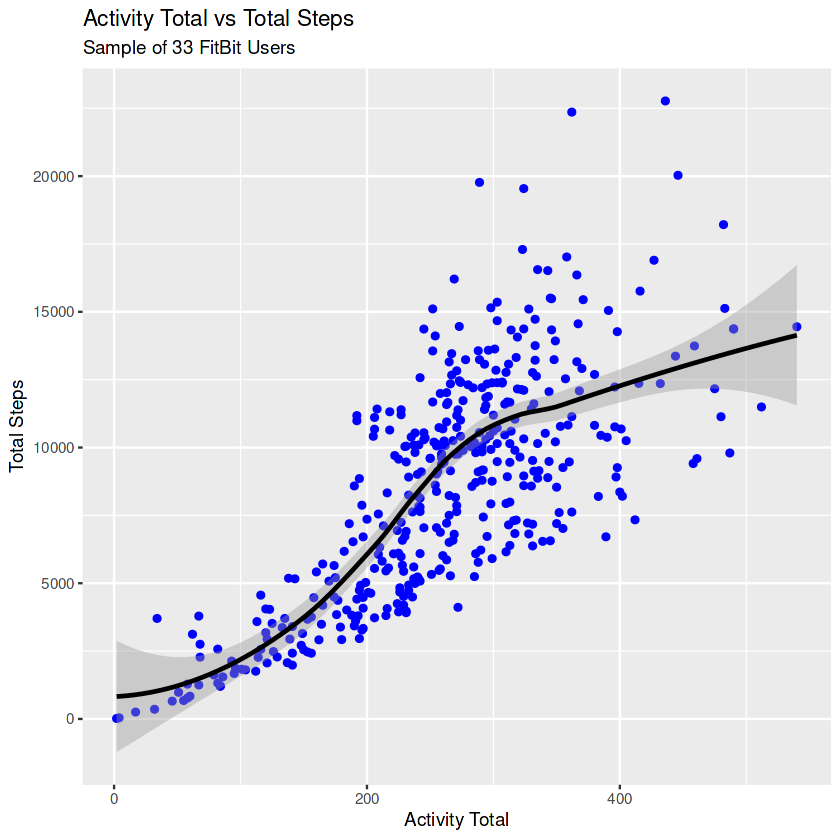

In [19]:
## Plot relationship between Activity Total vs Total Steps

ggplot(data=joined_data)+
  geom_point(mapping = aes(x=Activity_total, y=total_steps), color="blue")+
  geom_smooth(mapping = aes(x=Activity_total, y=total_steps),color="black")+
  labs(title = "Activity Total vs Total Steps", subtitle = "Sample of 33 FitBit Users", x="Activity Total", y="Total Steps")

**Analysis:** Here we can see that are assumption was correct. There is a positive relationship between total activity and total steps. The more active a user is the more steps taken daily.

Now that we know there is a positive relationship total activity and total steps. We can now question if the more steps a user takes will also have a positive relationship with the number of calories they burn. We would assume it does, but we will plot this relationship to make sure.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



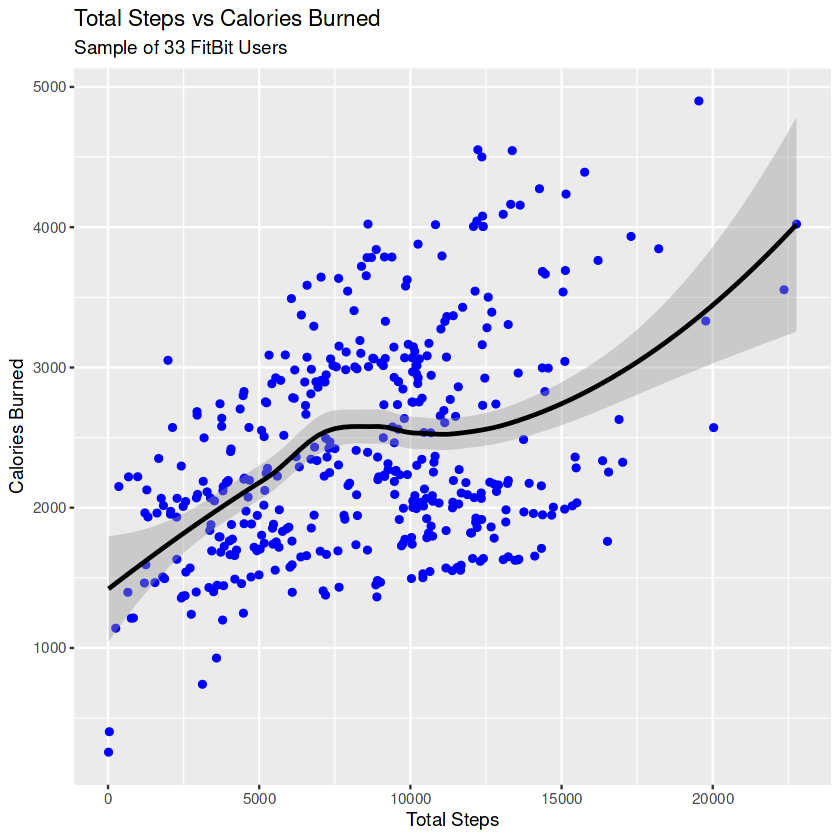

In [20]:
## Plot relationship between Total Steps vs Calories

ggplot(joined_data)+
  geom_point(mapping = aes(x=total_steps, y=calories), color="blue")+
  geom_smooth(mapping = aes(x=total_steps, y=calories), color="black")+
  labs(title = "Total Steps vs Calories Burned", subtitle = "Sample of 33 FitBit Users", x="Total Steps", y="Calories Burned")

**Analysis:** Here we can see a positive relationship between total steps taken and calories burned. So, the more steps a users takes daily, the more calories they burn overall. 

From all the information we have analyzed so far, we see that more steps taken daily has a positive correlation to how active a user is. It also has a positive correlation to the number of calories burned daily.

Now we are curious to know, what type of users are burning more calories?

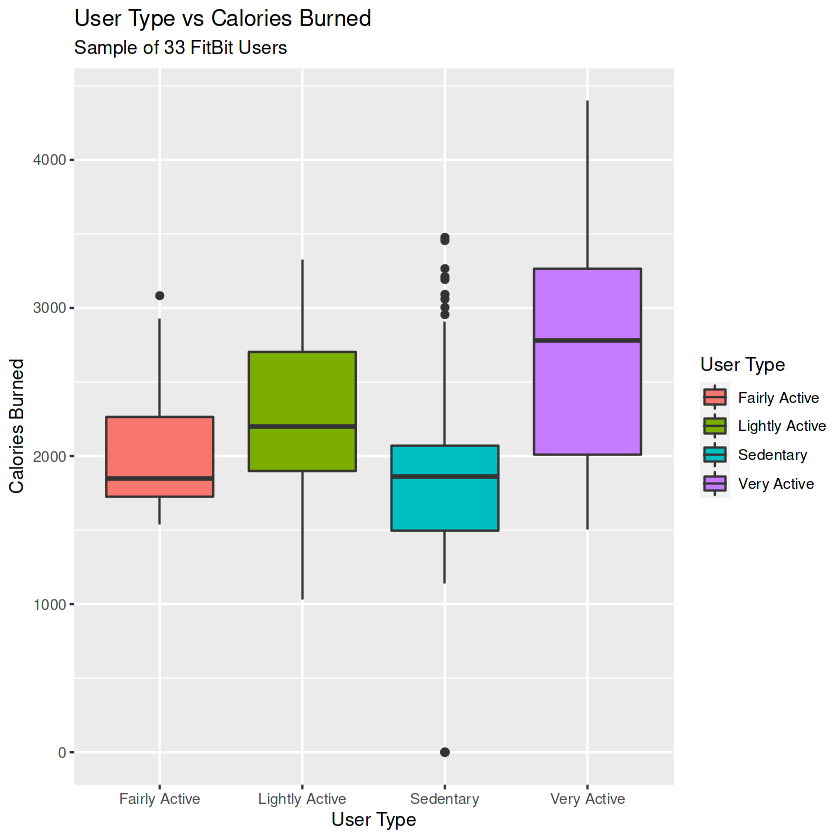

In [21]:
## Plot relationship between User Type vs Calories Burned

ggplot(data=user_activity_level)+
  geom_boxplot(mapping= aes(x=user_type, y=calories, fill=user_type))+
  labs(title = "User Type vs Calories Burned", subtitle = "Sample of 33 FitBit Users", x="User Type",y="Calories Burned")+
  guides(fill=guide_legend(title = "User Type"))

**Analysis:** Here we see the users that are more 'Very active' burn the most calories. Keeping in mind that that's only 4.50% of the total FitBit users in this sample. Next comes users that are more 'Lightly active', then 'Fairly active', last those users that are mostly sedentary burn the least. Also keeping in mind that more than half of the users in our sample are mostly sedentary (53.25%). 

So, from this we can point out that more than half of the samples users are not burning as many calories daily. Which also means they are not taking as many steps daily.

Let's say the sedentary users want to be more active to burn more calories. We know to burn more calories that they need to take more steps. So depending on their individual activity goal, we want to know how many steps or how much more distance do they need to cover daily. To burn more calories to reach a specific activity level. So let's plot a graph that shows the different types of users and the average distance they cover to be in that certain activity level.

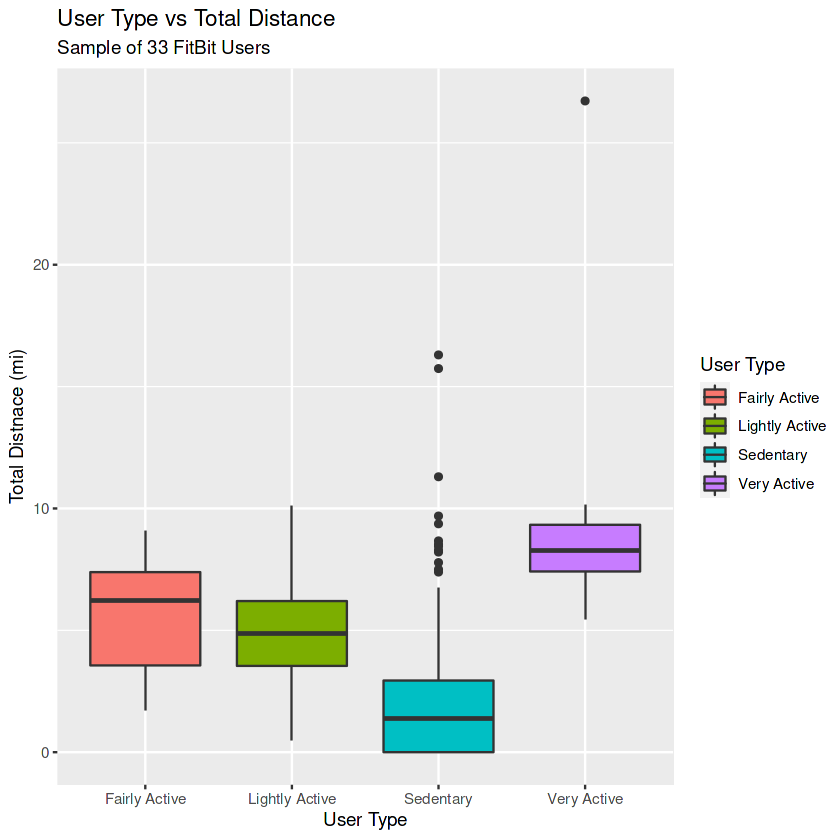

In [22]:
## Plot relationship between User Type vs Total Distance

ggplot(data=user_activity_level)+
  geom_boxplot(mapping= aes(x=user_type, y=total_distance, fill=user_type))+
  labs(title = "User Type vs Total Distance",subtitle = "Sample of 33 FitBit Users", x="User Type", y="Total Distnace (mi)")+
  guides(fill=guide_legend(title = "User Type"))

**Analysis:** Here we can see the different user types and the average amount of distance in miles users would have to reach daily to be considered (Very Active, Fairly Active, Lightly Active or Sedentary). 

Instead of the amount of distance we need to cover, how about just knowing how many steps users have to take on average daily to be considered (Very Active, Fairly Active, Lightly Active or Sedentary).

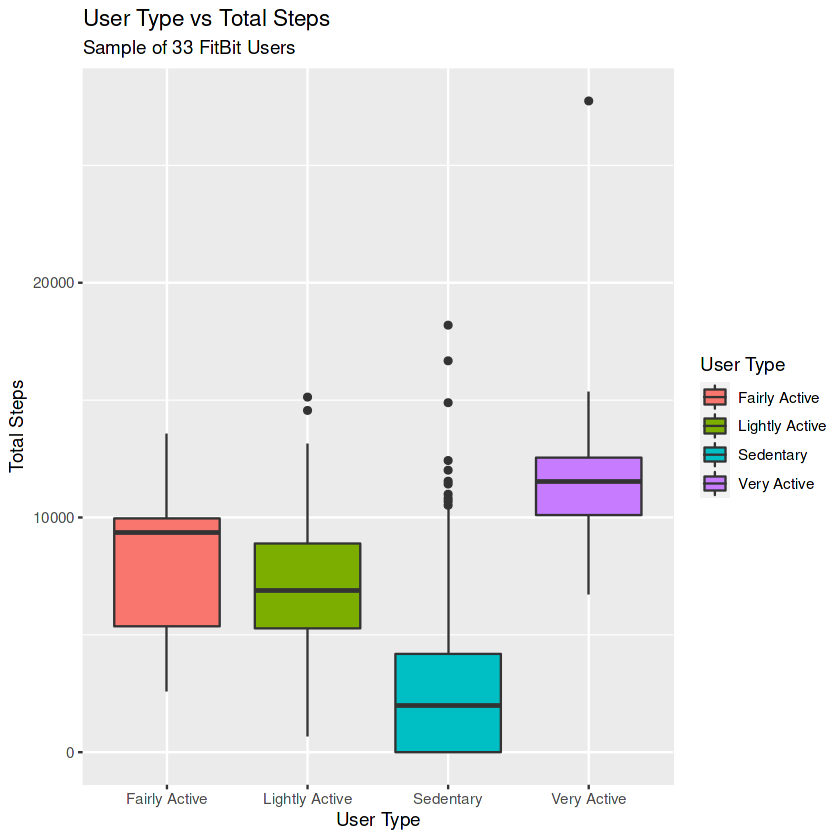

In [23]:
## Plot relationship between User Type vs Total Steps

ggplot(data=user_activity_level)+
  geom_boxplot(mapping= aes(x=user_type, y=total_steps, fill=user_type))+
  labs(title = "User Type vs Total Steps",subtitle = "Sample of 33 FitBit Users", x="User Type", y="Total Steps")+
  guides(fill=guide_legend(title = "User Type"))

**Analysis:** Here we can see the different user types. The average amount of steps users would have to reach daily to be considered (Very Active, Fairly Active, Lightly Active or Sedentary).

#   *Now we will shift over and analyze how Activity correlates with Sleep*

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



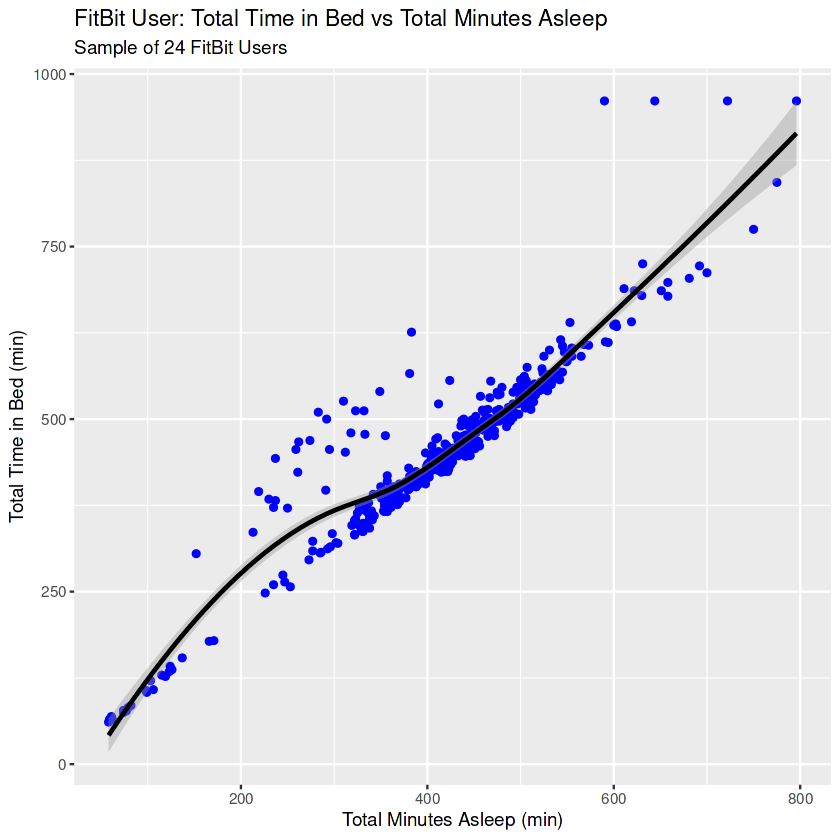

In [24]:
## Plot relationship between Time in Bed vs Total Time Asleep

ggplot(data=sleep_day)+
  geom_point(mapping = aes(x=total_minutes_asleep, y=total_time_in_bed),color="blue")+
  geom_smooth(mapping = aes(x=total_minutes_asleep, y=total_time_in_bed), color="black")+
  labs(title = "FitBit User: Total Time in Bed vs Total Minutes Asleep", subtitle = "Sample of 24 FitBit Users", x="Total Minutes Asleep (min)", y="Total Time in Bed (min)")

**Analysis:** Here we see a positive relationship between the total time spent in bed and the total minutes asleep. This tells us the more time users spend in bed the more sleep they get.

This makes us curious to know if the total steps users take daily has any correlation to the amount of sleep they get.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



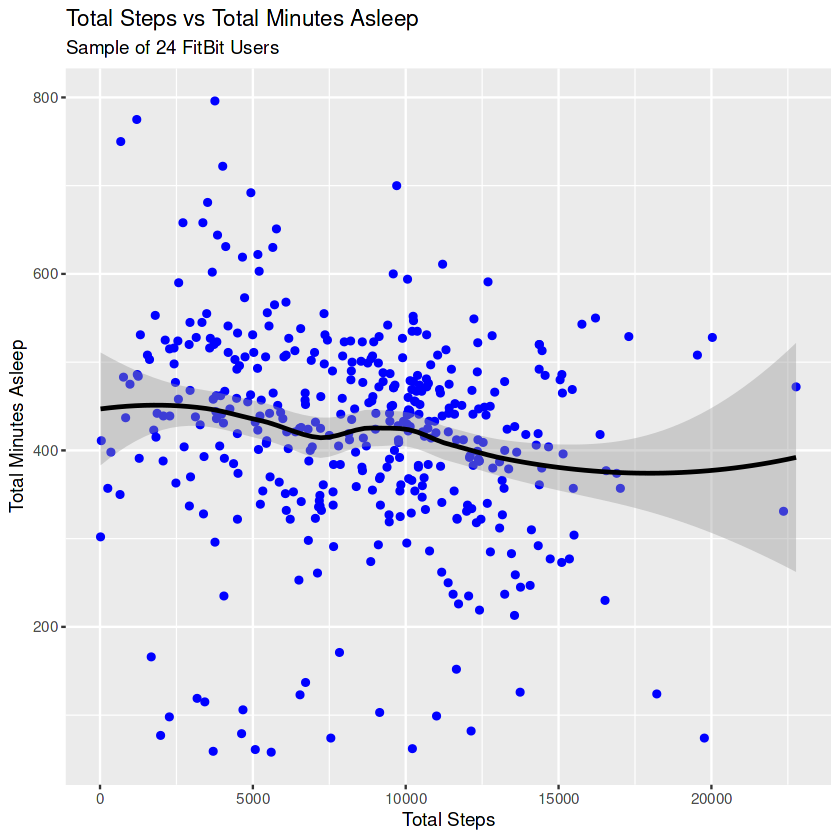

In [25]:
## Plot relationship between Total Steps vs Total Minutes Asleep

ggplot(data = joined_data)+
  geom_point(mapping = aes(x=total_steps, y=total_minutes_asleep), color="blue")+
  geom_smooth(mapping = aes(x=total_steps, y=total_minutes_asleep), color="black")+
  labs(title = "Total Steps vs Total Minutes Asleep", subtitle = "Sample of 24 FitBit Users", x="Total Steps", y="Total Minutes Asleep")

**Analysis:** Here we see that the total steps users take does not directly correlate to less or more sleep. The total minutes asleep in a way stays around the same average no matter how many steps users take.

Now let's see what the correlation is between the different user types and the total minutes asleep.

In [26]:
user_activity_level_2 <- joined_data %>%
  group_by(id) %>% 
  summarize(
    user_type=case_when(
      sedentary_minutes > mean(sedentary_minutes) & lightly_active_minutes < mean(lightly_active_minutes) & fairly_active_minutes < mean(fairly_active_minutes) & very_active_minutes < mean(very_active_minutes) ~ "Sedentary",
      sedentary_minutes < mean(sedentary_minutes) & lightly_active_minutes > mean(lightly_active_minutes) & fairly_active_minutes < mean(fairly_active_minutes) & very_active_minutes < mean(very_active_minutes) ~ "Lightly Active",
      sedentary_minutes < mean(sedentary_minutes) & lightly_active_minutes < mean(lightly_active_minutes) & fairly_active_minutes > mean(fairly_active_minutes) & very_active_minutes < mean(very_active_minutes) ~ "Fairly Active",
      sedentary_minutes < mean(sedentary_minutes) & lightly_active_minutes < mean(lightly_active_minutes) & fairly_active_minutes < mean(fairly_active_minutes) & very_active_minutes > mean(very_active_minutes) ~ "Very Active"),
    calories, total_distance,total_minutes_asleep) %>%
  drop_na()
head(user_activity_level_2)

`summarise()` has grouped output by 'id'. You can override using the `.groups`
argument.


id,user_type,calories,total_distance,total_minutes_asleep
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,Lightly Active,1985,8.50,327
1503960366,Sedentary,1797,6.97,384
1503960366,Fairly Active,1745,6.28,412
1503960366,Sedentary,1863,8.16,340
1503960366,Very Active,1728,6.48,700
1503960366,Sedentary,1786,6.68,360


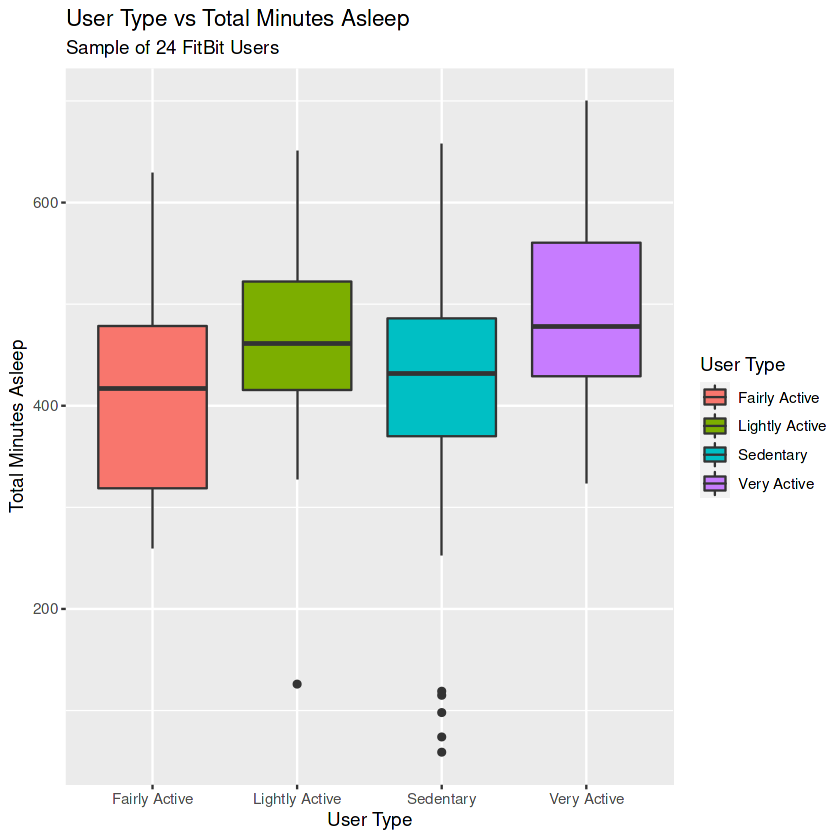

In [27]:
## Plot relationship between User Type vs Total Minutes Asleep

ggplot(data=user_activity_level_2)+
  geom_boxplot(mapping= aes(x=user_type, y=total_minutes_asleep, fill=user_type))+
  labs(title = "User Type vs Total Minutes Asleep",subtitle = "Sample of 24 FitBit Users", x="User Type", y="Total Minutes Asleep")+
  guides(fill=guide_legend(title = "User Type"))

**Analysis:** Here we see a very small difference in sleep between the different user types. They all on average overlap each other around the same time period. But we can clearly see that there is a portion of 'Very Active' users that get more sleep than the other types of users. On the downside, we see that more than half of the 'Fairly Active' users do not get as much sleep as the other users. Keeping in mind from before that 'Very Active' and 'Fairly Active' users make up the lowest percentages of the total users in this sample. There were only 4.50% of 'Very Active' users and 3.0% of 'Fairly Active' users. So, the majority of users get the average amount of sleep.

# **Phase #5-SHARE**

Here I will provide recommendation, based on our insights, for Bellabeat 'Time' product. Which is a watch that has a timeless look of a classic timepiece. With smart technology to track user activity, sleep and stress. The watch connects to the Bellabeat app to provide insights into daily wellness.

I chose the Bellabeat 'Time' watch from all the other offered products, because it works almost in the same way as the FitBit tracker watch. They both are worn by customers in the same way and provide wellness insights. So, I figured that of all the other Bellabeat products the recommendations from the insights would better suite a product that is worn and works in somewhat of the same way.


**Marketing Recommendations From Insights:**
1. The Design of the watch. 
    - (From the beginning of the analysis we determined that customers were not wearing their devices as frequently or consecutively as we thought. This could be due to the design of the watch. The design should be something that customers would want to wear to every occasion. To the point where they do not want to take it off. I would recommend marketing the watch as a device that can be used anytime/anywhere, to any occasion. Not only to help keep track of their wellness but also because the watch goes with everything.)

2. Market the device as motivation to stay on track
    - (From our insights we saw that more than half of the users were more sedentary than active throughout the day. While advertising the watch we want to emphasis how the watches' features can help customers stay on track with their various fitness/wellness goals. Showing them exactly how it can track their daily activity, sleep and stress stats, is great motivation to stay on track. Customers can set goals for themselves daily and keep track of everything on their 'Time' watches.)
    - (There may be customers just starting out on a fitness journey. Purchasing the 'Time' watch may be just what they need for their first steps. They will be able to physically see what their current daily habits are. From there be able to set goals for themselves and adjust their habits. If that's taking more steps daily or intensifying their workouts to burn more calories. We saw from out insights that the more steps taken positively correlates with users activity level, that also positively correlates to how many calories are burned.)
    
3. Helping their trainers out
    - (Some customers or potential customers may have a trainer or maybe thinking about getting one. No matter what their fitness/wellness goal is their trainer can see what their daily activity and sleeping habits are outside of their regular training session. This can help not only the customers but the trainers to make connections through gaps they cannot see.
    
**Further Actions/Suggestions:**
1. I believe we were very limited with the data provided. We were only able to analyze 30 FitBit users. I would recommend if we wanted further insights, we could collect more data from different type of users, to be able to analyze a bigger sample size.

2. I would suggest giving users a survey and collecting data on how long users are wearing their devices daily.
    - (This may give us a better insight on the rest of the data collected, especially on user's activity levels.)

3. I would suggest giving users a survey on why they decided to purchase this device.
    - (Was it just to keep track of their daily sleep habits, are they trying to lose weight or training for a marathon, etc. Finding out why the majority of users purchase the device can be helpful when marketing it to a certain demographic. From there we can find out how to better market the devices features towards those demographics.)